In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
import pickle

Import

In [237]:
df = pd.read_csv('data/cars_infos_cleaned.csv')

Répartition

In [238]:
# On définit notre target
y = df['Prix($)']
# Et nos features, en supprimant les features qui baisserait la précision de notre modèle.
X = df[[
    'Marque',
    # 'Modèle',
    'Classe', 
    'Portes', 
    'Longueur(cm)',
    # 'Hauteur(cm)', 
    'Largeur(cm)', 
    # 'Empattement(cm)', 
    'Moteur(cm³)',
    'Poids(t)', 
    'Carburant', 
    'ConsommationVille(L/100km)',
    # 'ConsommationAutoroute(L/100km)',
    'PositionMoteur',
    'Transmission',
    'Chevaux',
    # 'Régime(tr/min)', 
    'Turbo', 
    'Cylindres', 
    # 'Injecteur',
    # 'TypeMoteur', 
    # 'Alésage(mm)', 
    # 'Piston(cm)', 
    # 'TauxCompression',
    # 'CoteRisque'
]]

Séparation train/test

In [239]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
    )

Répartition des features

In [240]:
numeric_features = [ 
    'Longueur(cm)',
    # 'Hauteur(cm)', 
    'Largeur(cm)', 
    # 'Empattement(cm)', 
    'Moteur(cm³)',
    'Poids(t)', 
    'ConsommationVille(L/100km)',
    # 'ConsommationAutoroute(L/100km)',
    'Chevaux',
    # 'Régime(tr/min)', 
    'Cylindres', 
    # 'Alésage(mm)', 
    # 'Piston(cm)', 
    # 'TauxCompression',
    # 'CoteRisque'
]

categorical_features = [
    'Marque',
    # 'Modèle',
    'Classe', 
    'Portes', 
    'Carburant', 
    'PositionMoteur',
    'Transmission',
    'Turbo', 
    # 'Injecteur',
    # 'TypeMoteur', 
]

Transformateur numérique

In [241]:
numeric_transformer_std = Pipeline([
    ('standard', StandardScaler()),
    #on ajoute les polynomial features
    ('poly', PolynomialFeatures(degree=3))
    ])

Transformateur catégorielle

In [242]:
categorical_transformer = OneHotEncoder(sparse_output=True, handle_unknown='ignore')

In [243]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_std, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

Estimateur

In [244]:
randomforest = RandomForestRegressor()

Pipeline

In [245]:
pipe = Pipeline([
    ('prep', preprocessor),
    ('esti', randomforest)
])

Score

In [246]:
trained_pipe = pipe.fit(X_train, y_train)
trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)

0.9495503800156135

Export

In [247]:
pickle.dump(trained_pipe, open('data/trained_pipe.pkl', 'wb'))

Learning Curves

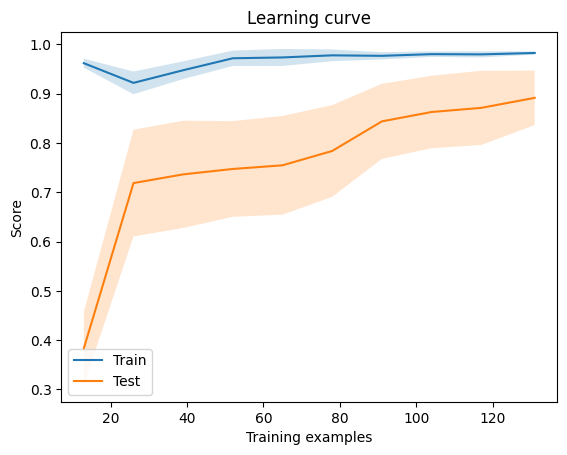

In [248]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=trained_pipe, X=X_train, y=y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring="r2")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Test")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve")
plt.legend(loc="best")
# plt.savefig('Learning_Curve.png')
plt.show()